# IMAGE CLASSIFICATION USING KERAS TENSORFFLOW


**What is Image Classification**

Image classification is the task of assigning a label (class) to an input image. For example, classifying an image as a "cat" or "dog".

**When and Why to Use It**

Use image classification when your goal is to identify or categorize images into predefined classes. It is widely used in facial recognition, medical imaging, traffic sign detection, and many more applications.


## Install required libraries

In [172]:
!pip install tensorflow
!pip install keras
!pip install numpy
!pip install matplotlib

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

## Step 1: Select or Load Dataset



- Load CIFAR-10 (built-in)
- CIFAR-10 (10 classes, small images)

https://www.cs.toronto.edu/~kriz/cifar.html

In [174]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [175]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


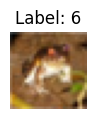

In [176]:
index = 0  # you can change this to any index
plt.figure(figsize=(1, 1))
plt.imshow(x_train[index])
plt.title(f"Label: {y_train[index][0]}")  # from 0 to 9
plt.axis('off')
plt.show()

In [177]:
clases = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [178]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [179]:
y_train = y_train.reshape(-1,) # 2D to 1D
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [180]:
# 10 unique classes 0-9
unique_labels = np.unique(y_train)
print(unique_labels)

[0 1 2 3 4 5 6 7 8 9]


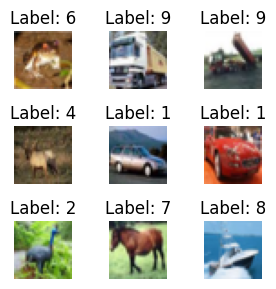

In [181]:
plt.figure(figsize=(3, 3))
for i in range(9):  # show first 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i]}")  # just numeric labels
    plt.xlabel(clases[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


## Step 2: Preprocess the Data
Images are usually in pixel range 0 to 255. Neural networks work better when input data is scaled to 0 to 1.

In [182]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## Step 3: Build the CNN Model

- ANN

  - Sensitive to location of an object in an image
  - too much computation
- CNN

  - convolution + pooling **give location invariant features detection**
  - reduce overfitting
  
CNNs (Convolutional Neural Networks) are good for image classification. They use filters to learn spatial patterns.

In [183]:
model= Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Explain Code
Conv, Pooling, Dense, Dropout

- Input layer(input_shape)
- Hidden layers (Conv, Pooling, Dense, Dropout)
- Output layer

**1st Convolutional Layer**

  - Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))

    Explanation:
    - 32 filters (feature detectors), each of size 3x3.
    - ReLU is used to introduce **non-linearity** (faster training, avoids vanishing gradient).
    - input_shape is needed only in the first layer to define image shape (32x32 RGB).

    What if we don’t use it?
    - The model won't extract spatial features like edges, textures.

    Alternative:
    - Use more/less filters or a different filter size (e.g., 5x5).



**1st Pooling Layer**

  - MaxPooling2D((2, 2))

    Explanation:
    - **Reduces the spatial dimension** (downsampling).
    - Keeps the most important features.
    - Reduces computation and overfitting.

    What if we don’t use it?
    - Model may overfit and be slower due to large feature maps.

    Alternative:
    - AveragePooling2D (takes average instead of max).


**2nd Convolutional Layer**

  - Conv2D(64, (3, 3), activation='relu')

    Explanation:
    - Adds more filters (64) to learn more complex patterns.

    What if we skip it?
    - Model may not learn deep, abstract features like shapes, object parts.

**2nd Pooling Layer**

  - MaxPooling2D((2, 2))

    Explanation:
    - Further reduces spatial dimensions.
    - Helps generalize and speeds up training.


**Flatten Layer**

  - Flatten()

    Explanation:

    - **Converts the 2D feature maps into a 1D vector to feed into Dense layers.**

    What if we don’t use it?
    - Dense layers expect 1D input, so it will throw an error.

    Alternative:
    - GlobalAveragePooling2D (reduces each feature map to a single number).



**Fully Connected Dense Layer**

  - Dense(128, activation='relu')

    Explanation:
    - **Fully connected layer with 128 neurons to combine features and make decisions.**
    - ReLU adds non-linearity and helps model learn complex patterns.

    What if skipped?
    - Model may lack capacity to classify well.

    Alternative:
    - Use more/less units, or other activations like 'tanh' or 'leaky_relu'.

**Dropout Layer**

  - Dropout(0.5)

    Explanation:
    
    - **Prevents overfitting by randomly disabling 50% neurons during training.**

    What if not used?
    - Model might memorize training data and not generalize well.

    Alternative:
    - BatchNormalization or L2 regularization.

**Output Layer**

  - Dense(10, activation='softmax')

    Explanation:
    - 10 neurons for 10 classes (e.g., digits 0–9).
    - **Softmax converts output to probability distribution.[0,1]**

    What if not used?
    - Wrong predictions or model won’t converge for classification.

    Alternative:
    - For binary classification, use 1 neuron with 'sigmoid' activation.


## Step 4: Compile the Model
Use sparse_categorical_crossentropy for integer labels and categorical_crossentropy for one-hot encoded labels.

**The compile step defines how the model will learn. You must specify:**

- **Optimizer:** controls how the model improves(sgd,adam)

- **Loss function:** measures error between prediction and target

- **Metrics:** used to evaluate performance

In [184]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Step 5: Train the Model
Use the fit() method to train the model on the training data. You can also validate during training using validation split or validation data.


**epochs=10:** The model will train for 10 complete passes through the training data.

**batch_size=64:** The data will be processed in mini-batches of 64 samples.

**validation_split=0.2:** 20% of the training data will be used for validation during training.

The training progress (loss and accuracy) will be stored in the history object for later visualization.

In [185]:
history = model.fit(
    x_train, y_train,
    validation_data = (x_test,y_test),
    epochs=10
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.3012 - loss: 1.8651 - val_accuracy: 0.5312 - val_loss: 1.2882
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 44ms/step - accuracy: 0.5518 - loss: 1.2672 - val_accuracy: 0.5933 - val_loss: 1.1552
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.6221 - loss: 1.0837 - val_accuracy: 0.6549 - val_loss: 0.9735
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.6657 - loss: 0.9549 - val_accuracy: 0.6874 - val_loss: 0.9113
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.6984 - loss: 0.8575 - val_accuracy: 0.6776 - val_loss: 0.9197
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7206 - loss: 0.8011 - val_accuracy: 0.6977 - val_loss: 0.8845
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.7353 - loss: 0.7525 - val_accuracy: 0.7101 - val_loss: 0.8595
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.7547 -

## Step 6: Evaluate the Model
After training, test the model on unseen data using evaluate().

In [186]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy: ",test_acc*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7112 - loss: 0.8346
Test Accuracy:  71.10000252723694


## Step 7: Make Predictions
You can use predict() to classify new or test images.



 **model.predict(x_test)**

* This gives you the **raw prediction probabilities** for each class.
* For example, if you have 10 classes (0 to 9), each prediction will be something like:

  [0.01, 0.03, 0.92, 0.01, 0.01, 0.00, 0.01, 0.00, 0.00, 0.01]


  This means the model is **92%** confident that the image belongs to **class 2**.

**np.argmax(predictions, axis=1)**

*  returns the **index of the highest value**, which corresponds to the predicted class.
* So, from the above prediction, `argmax` will return `2`.

**Final Output:**

* predicted_classes is a 1D array with predicted class labels in **numeric form**:

  [2, 0, 4, 7, 1, ...]
  

This is **useful for comparing** with your actual test labels (`y_test`) and for visualizing predictions.


In [187]:

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


### Classification Model

In [188]:
cm = confusion_matrix(y_test, predicted_classes)

<Axes: >

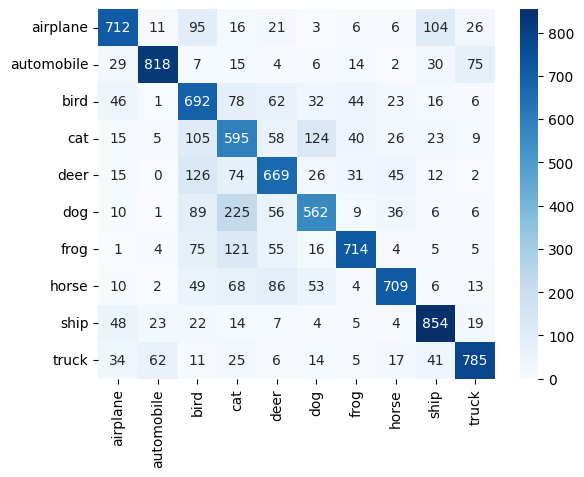

In [189]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clases, yticklabels=clases)


In [190]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1000
           1       0.88      0.82      0.85      1000
           2       0.54      0.69      0.61      1000
           3       0.48      0.59      0.53      1000
           4       0.65      0.67      0.66      1000
           5       0.67      0.56      0.61      1000
           6       0.82      0.71      0.76      1000
           7       0.81      0.71      0.76      1000
           8       0.78      0.85      0.81      1000
           9       0.83      0.79      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



To compare predictions with actual values:

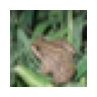

Predicted: 6
Actual: [6]


In [191]:
index = 0
plt.figure(figsize=(1, 1))
plt.imshow(x_test[4])
plt.axis('off')
plt.show()


print("Predicted:", predicted_classes[4])
print("Actual:", y_test[4])

## Step 8: Visualize Results
Accuracy and Loss Curves:

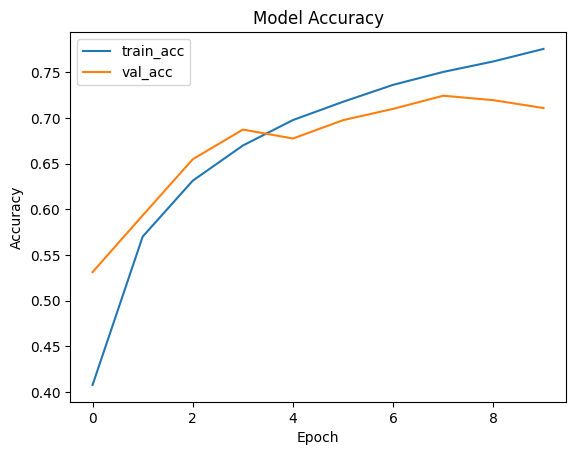

In [192]:

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Step 9: Save and Load the Model

In [193]:
model.save("my_model.h5")
# later

model = load_model("my_model.h5")


To load the model later:

In [194]:
# model = load_model("my_model.h5")

## Step10. Model Summary
It shows all layers, output shapes, and parameters.


In [195]:
model.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,732 (495.05 KB)

 Trainable params: 126,730 (495.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Step 11: Improve the Model


You can improve the model by:

- Adding more convolutional layers

- Using dropout to reduce overfitting

- Increasing training epochs

- Using data augmentation


 Data Augmentation
- **Data augmentation** creates new, slightly modified versions of training images (e.g., rotated, shifted, flipped).

- This helps the model learn better and generalize well, especially when training data is limited.